In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("diabetes.csv")

### EDA and Feature Engineering

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Visualizing the Data

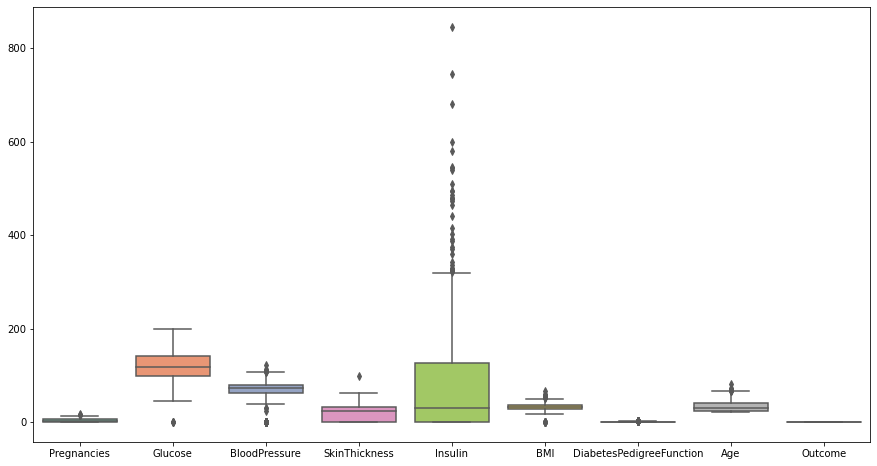

In [5]:
ax = plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=data, orient="v", palette="Set2")

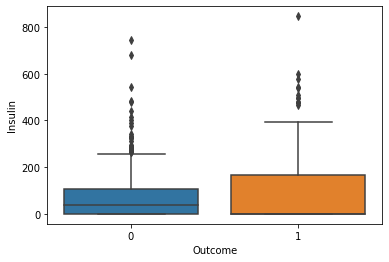

In [6]:
ax = sns.boxplot(x="Outcome", y="Insulin", data=data)

In [7]:
x = data.drop(columns = "Outcome")
y = data["Outcome"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [11]:
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 5)
svm = SVC(C=1)
gnb = GaussianNB()
models = {"Logistic Regression":lr , "KNN":knn, "SVM":svm, "Gaussian NB":gnb}

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy = []
for name, model in models.items():
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    acc = accuracy_score (ytest, ypred)
    accuracy.append(acc)
    print("For {} the accuracy is {} ".format(name,acc))

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For Logistic Regression the accuracy is 0.8246753246753247 
For KNN the accuracy is 0.7532467532467533 
For SVM the accuracy is 0.7922077922077922 
For Gaussian NB the accuracy is 0.7922077922077922 
